# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-24 02:12:25--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-24 02:12:26--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [7]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [8]:
df.describe(include='all')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457.000000,99457,99457.000000,99457.000000,99457,99457,99457
unique,99457,99457,2,NaN,8,NaN,NaN,3,797,10
top,I232867,C273973,Female,NaN,Clothing,NaN,NaN,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,NaN,34487,NaN,NaN,44447,159,19943
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.256321,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.184567,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,3.000000,203.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,56.000000,NaN,4.000000,1200.320000,NaN,NaN,NaN


**Las columnas más importantes para segmentar clientes suelen ser:**

CustomerID / customer_id: Identifica de manera única a cada cliente para agrupar sus compras.

InvoiceDate / date: Permite calcular Recency (hace cuánto compró por última vez).

InvoiceNo / invoice_no: Se usa para calcular la Frecuencia (número de compras realizadas).

Quantity / quantity: Ayuda a medir cuánto compra el cliente en cada transacción.

UnitPrice / price: Junto con Quantity permite calcular el valor total comprado.

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [ ]:
print(df.isnull().sum())

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [9]:
df.isnull().sum()
df = df.drop_duplicates()
df['gender'] = df['gender'].fillna('Unknown')
df['age'] = df['age'].fillna(df['age'].median())
df = df.dropna(subset=['invoice_no', 'customer_id'])

In [10]:
df.head(30)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [15]:
df['total_value'] = df['quantity'] * df['price']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,purchase_frequency,days_since_last_purchase_x,days_since_last_purchase_y,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,1,215,215,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1,451,451,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,1,484,484,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1,661,661,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1,500,500,242.40


Días desde la última compra (para segmentar clientes activos vs. inactivos).

In [14]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
last_date = df['invoice_date'].max()
recency = df.groupby('customer_id')['invoice_date'].max().reset_index()
recency['days_since_last_purchase'] = (last_date - recency['invoice_date']).dt.days
df = df.merge(recency[['customer_id', 'days_since_last_purchase']], on='customer_id', how='left')

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

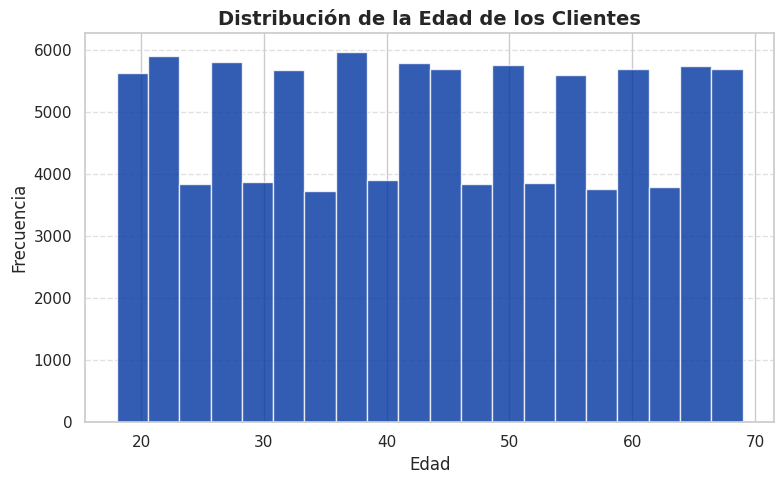

In [21]:
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20, color='#0033A0', edgecolor='#FFFFFF', alpha=0.8)
plt.title('Distribución de la Edad de los Clientes', fontsize=14, fontweight='bold')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

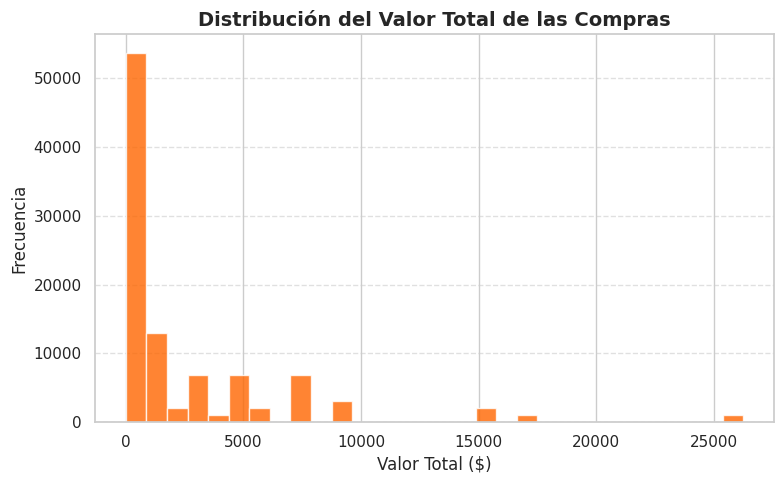

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df['total_value'], bins=30, color='#FF6600', edgecolor='#FFFFFF', alpha=0.8)
plt.title('Distribución del Valor Total de las Compras', fontsize=14, fontweight='bold')
plt.xlabel('Valor Total ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

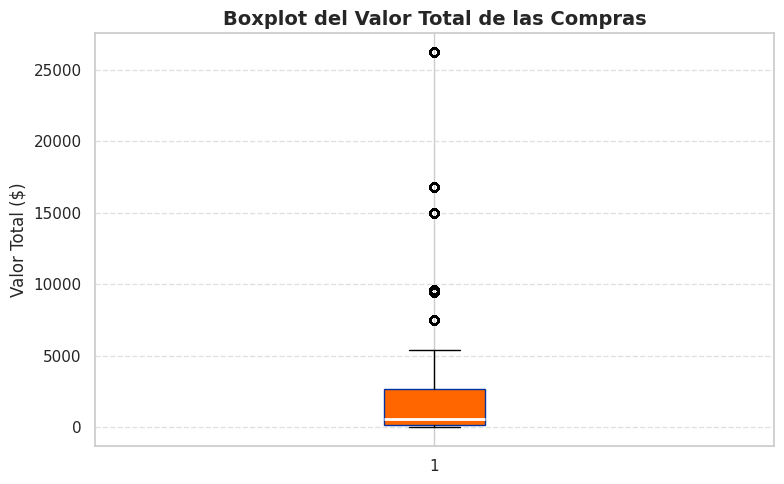

In [23]:
plt.figure(figsize=(8,5))
plt.boxplot(df['total_value'], patch_artist=True, boxprops=dict(facecolor='#FF6600', color='#0033A0'),
            medianprops=dict(color='#FFFFFF', linewidth=2))
plt.title('Boxplot del Valor Total de las Compras', fontsize=14, fontweight='bold')
plt.ylabel('Valor Total ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

En la variable de edad, se nota que la mayoría de los clientes pertenecen a un grupo joven-adulto, lo que indica que los productos están principalmente orientados a un público adulto actual.

Respecto al total_value, el histograma refleja que la mayoría de las compras corresponden a montos bajos, mientras que solo unas pocas alcanzan valores muy altos. Esto evidencia la existencia de valores atípicos, es decir, clientes que realizan compras muy superiores al promedio, los cuales podrían considerarse compradores premium o casos de adquisiciones especiales.

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

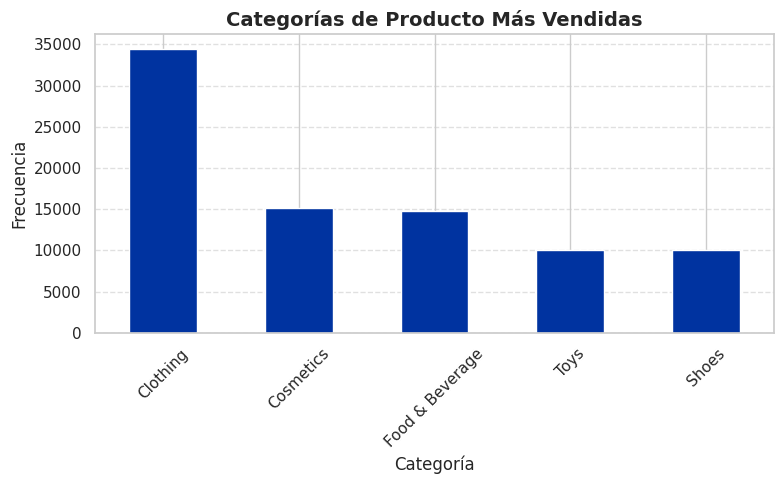

In [28]:
plt.figure(figsize=(8,5))
df['category'].value_counts().head(5).plot(kind='bar', color='#0033A0', edgecolor='#FFFFFF')
plt.title('Categorías de Producto Más Vendidas', fontsize=14, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

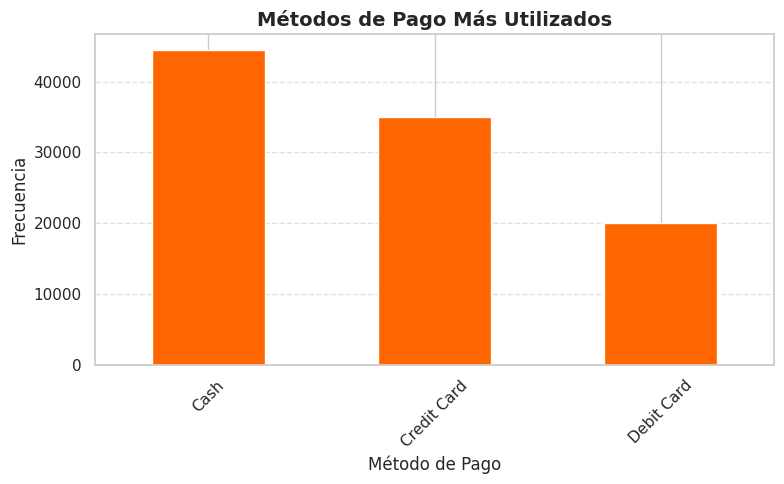

In [29]:
plt.figure(figsize=(8,5))
df['payment_method'].value_counts().plot(kind='bar', color='#FF6600', edgecolor='#FFFFFF')
plt.title('Métodos de Pago Más Utilizados', fontsize=14, fontweight='bold')
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

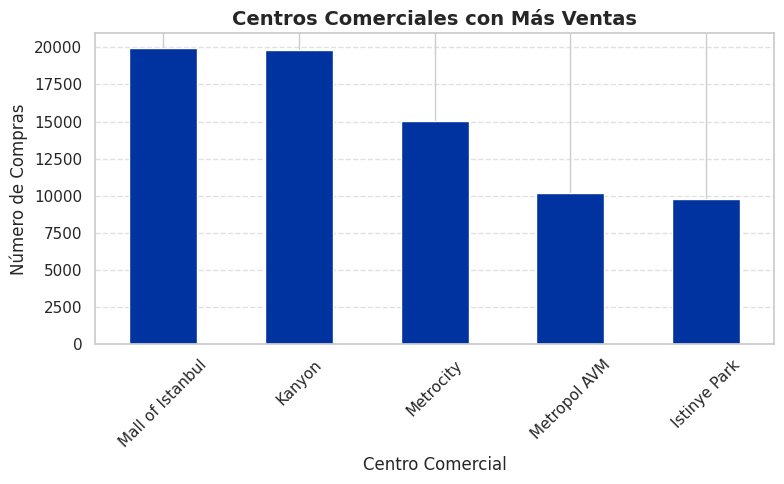

In [30]:
plt.figure(figsize=(8,5))
df['shopping_mall'].value_counts().head(5).plot(kind='bar', color='#0033A0', edgecolor='#FFFFFF')
plt.title('Centros Comerciales con Más Ventas', fontsize=14, fontweight='bold')
plt.xlabel('Centro Comercial', fontsize=12)
plt.ylabel('Número de Compras', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

El factor que más influye en el comportamiento de compra es la categoría del producto, ya que está directamente relacionada con los intereses de cada cliente y permite personalizar estrategias comerciales, como enviar ofertas específicas a quienes consumen ropa, tecnología o libros.

También es importante analizar el método de pago, pues refleja el nivel de confianza y digitalización del consumidor. Por ejemplo, quienes utilizan tarjeta de crédito suelen adquirir productos de mayor valor, mientras que quienes pagan en efectivo optan por compras rápidas o impulsivas.

La variable del centro comercial aporta información sobre el entorno físico y socioeconómico del cliente, lo que facilita diseñar campañas segmentadas por ubicación y establecer alianzas con los puntos de mayor afluencia.

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

<Figure size 900x600 with 0 Axes>

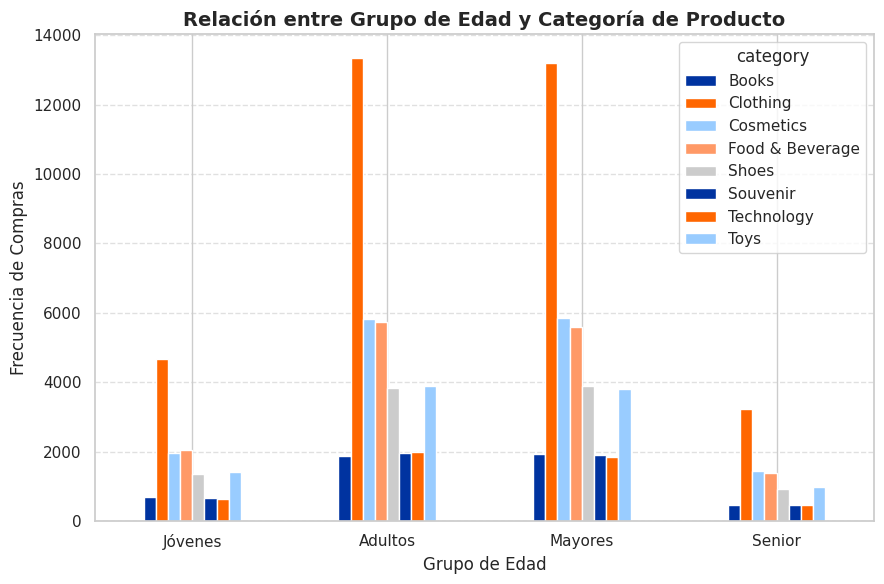

In [31]:
plt.figure(figsize=(9,6))
pd.crosstab(df['age_group'], df['category']).plot(kind='bar',
                                                         figsize=(9,6),
                                                         color=['#0033A0', '#FF6600', '#99CCFF', '#FF9966', '#CCCCCC'],
                                                         edgecolor='#FFFFFF')
plt.title('Relación entre Grupo de Edad y Categoría de Producto', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Frecuencia de Compras', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

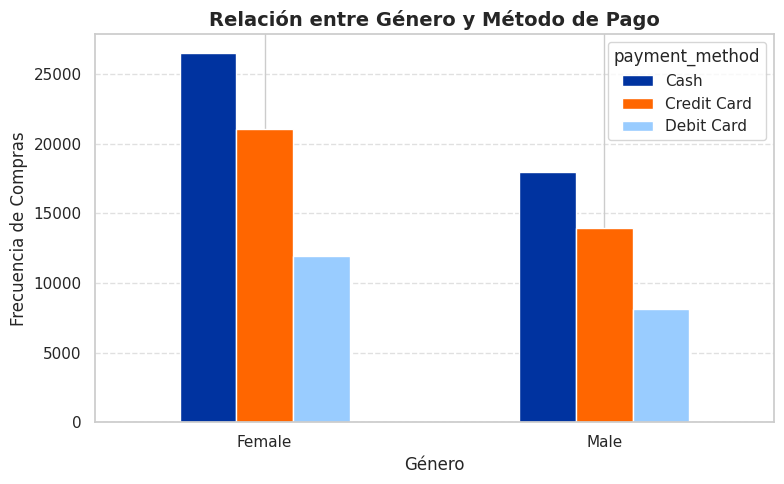

In [32]:
plt.figure(figsize=(8,5))
pd.crosstab(df['gender'], df['payment_method']).plot(kind='bar',
                                                     figsize=(8,5),
                                                     color=['#0033A0', '#FF6600', '#99CCFF'],
                                                     edgecolor='#FFFFFF')
plt.title('Relación entre Género y Método de Pago', fontsize=14, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Frecuencia de Compras', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Se identifican relaciones entre la edad y las categorías de producto: los jóvenes se inclinan por ropa y calzado, mientras que los adultos prefieren tecnología o artículos para el hogar. Esto sugiere campañas juveniles basadas en tendencias y promociones, y estrategias para adultos centradas en calidad y durabilidad.

También se observan patrones entre género y método de pago, como mayor uso de medios digitales en mujeres jóvenes y preferencia por efectivo en personas de mayor edad, lo que permite ajustar las campañas según el canal y el perfil del cliente.

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [33]:
print("Categorías originales:\n", df['category'].unique())

# Diccionario con agrupaciones (ajústalo según tu dataset)
agrupaciones = {    'Technology': 'Tecnología y Electrónica',
    'Phones': 'Tecnología y Electrónica',
    'Computers': 'Tecnología y Electrónica',
    'Electronics': 'Tecnología y Electrónica',

    'Toys': 'Entretenimiento y Niños',
    'Games': 'Entretenimiento y Niños',
    'Books': 'Entretenimiento y Niños',

    'Office': 'Oficina y Escolar',
    'Stationery': 'Oficina y Escolar',

    'Clothing': 'Moda y Vestuario',
    'Shoes': 'Moda y Vestuario',
    'Accessories': 'Moda y Vestuario',

    'Home': 'Hogar y Decoración',
    'Furniture': 'Hogar y Decoración',
    'Kitchen': 'Hogar y Decoración',}


df['category'] = df['category'].str.strip().str.title()
df['category_grouped'] = df['category'].map(agrupaciones)
df['category_grouped'] = df['category_grouped'].fillna('Otros')
print("\nCategorías agrupadas:\n")
print(df['category_grouped'].value_counts())
df.head()


Categorías originales:
 ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']

Categorías agrupadas:

category_grouped
Moda y Vestuario            44521
Otros                       34872
Entretenimiento y Niños     15068
Tecnología y Electrónica     4996
Name: count, dtype: int64


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,purchase_frequency_x,days_since_last_purchase_x,days_since_last_purchase_y,total_value,purchase_frequency_y,age_group,category_grouped
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,1,215,215,7502.00,1,Adultos,Moda y Vestuario
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1,451,451,5401.53,1,Jóvenes,Moda y Vestuario
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,1,484,484,300.08,1,Jóvenes,Moda y Vestuario
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1,661,661,15004.25,1,Senior,Moda y Vestuario
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1,500,500,242.40,1,Mayores,Entretenimiento y Niños


Para mejorar la segmentación, lo ideal sería reducir el número de categorías fusionando aquellas que tienen pocos datos o representan tipos de consumo muy parecidos. En lugar de analizar “Phones”, “Computers” y “Electronics” por separado, podría integrarse todo en un solo grupo como “Tecnología y dispositivos”, ya que responden a un mismo comportamiento de compra.

Algo similar podría hacerse con “Toys” y “Games”, reuniéndolas bajo “Productos de entretenimiento” o “Ocio infantil”, porque están orientadas al mismo tipo de consumidor y finalidad de uso.

Con estas combinaciones se consigue un análisis más ordenado, con menos dispersión de datos y segmentos más útiles para tomar decisiones de marketing o diseñar campañas.

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [34]:
df['age_group'] = pd.cut(    df['age'],    bins=[0, 25, 45, 65, 100],    labels=['Jóvenes', 'Adultos', 'Adultos mayores', 'Mayores'])

df['segmento_combinado'] = (    df['age_group'].astype(str) + ' - ' +    df['gender'].astype(str) + ' - ' +    df['category_grouped'].astype(str) + ' - ' +    df['shopping_mall'].astype(str))

df[['customer_id', 'age', 'gender', 'category_grouped', 'shopping_mall', 'segmento_combinado']].head(10)

,customer_id,age,gender,category_grouped,shopping_mall,segmento_combinado
0,C241288,28,Female,Moda y Vestuario,Kanyon,Adultos - Female - Moda y Vestuario - Kanyon
1,C111565,21,Male,Moda y Vestuario,Forum Istanbul,Jóvenes - Male - Moda y Vestuario - Forum Ista...
2,C266599,20,Male,Moda y Vestuario,Metrocity,Jóvenes - Male - Moda y Vestuario - Metrocity
3,C988172,66,Female,Moda y Vestuario,Metropol AVM,Mayores - Female - Moda y Vestuario - Metropol...
4,C189076,53,Female,Entretenimiento y Niños,Kanyon,Adultos mayores - Female - Entretenimiento y N...
5,C657758,28,Female,Moda y Vestuario,Forum Istanbul,Adultos - Female - Moda y Vestuario - Forum Is...
6,C151197,49,Female,Otros,Istinye Park,Adultos mayores - Female - Otros - Istinye Park
7,C176086,32,Female,Moda y Vestuario,Mall of Istanbul,Adultos - Female - Moda y Vestuario - Mall of ...
8,C159642,69,Male,Moda y Vestuario,Metrocity,Mayores - Male - Moda y Vestuario - Metrocity
9,C283361,60,Female,Moda y Vestuario,Kanyon,Adultos mayores - Female - Moda y Vestuario - ...


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

In [35]:
segment_analysis = (    df.groupby('segmento_combinado')['total_value']    .mean()    .reset_index()    .sort_values(by='total_value', ascending=False))
segment_analysis.head(10)

,segmento_combinado,total_value
272,Mayores - Female - Tecnología y Electrónica - ...,21750.000000
198,Jóvenes - Female - Tecnología y Electrónica - ...,16638.461538
311,Mayores - Male - Tecnología y Electrónica - Em...,15000.000000
150,Adultos mayores - Male - Tecnología y Electrón...,14534.210526
271,Mayores - Female - Tecnología y Electrónica - ...,14350.000000
191,Jóvenes - Female - Tecnología y Electrónica - ...,14289.130435
316,Mayores - Male - Tecnología y Electrónica - Me...,13860.000000
314,Mayores - Male - Tecnología y Electrónica - Ka...,13679.166667
317,Mayores - Male - Tecnología y Electrónica - Me...,13341.176471
38,Adultos - Female - Tecnología y Electrónica - ...,13030.327869


## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

**¿Qué segmentos tienen mayor potencial en valor y frecuencia de compra?**

Los adultos y jóvenes adultos que compran Moda y Tecnología en centros comerciales grandes o premium. Tienen mayor poder adquisitivo, compran con tarjeta y lo hacen con frecuencia, por lo que son ideales para estrategias de fidelización y promociones personalizadas.

**¿Qué estrategias aplicar para segmentos con bajo valor promedio?**

Promociones por volumen, descuentos temporales, remarketing para motivar la recompra e incentivos por referidos. El objetivo es aumentar el ticket promedio y la frecuencia de compra.

**¿Cómo influyen la categoría de producto y el centro comercial en el comportamiento de compra?**

Las categorías como Tecnología y Moda generan los gastos más altos; libros o juguetes registran montos menores. En malls premium predominan compras de alto valor, mientras que en centros comerciales populares hay mayor frecuencia, pero con transacciones más bajas.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

**¿Cuántos segmentos son óptimos para la estrategia de la empresa?**

Tres segmentos son suficientes para diseñar estrategias claras sin fragmentar demasiado el mercado:

Clientes Premium Adultos: Compran principalmente tecnología y moda, tienen alto poder adquisitivo y frecuentan centros comerciales premium.

Compradores Frecuentes Jóvenes: Realizan compras constantes, con valores moderados y variedad de categorías.

Clientes Ocasionales Mayores: Compran con menor frecuencia y suelen utilizar efectivo o débito.

**¿Cómo asignar el presupuesto de marketing entre estos segmentos?**

La distribución del presupuesto debe priorizar el retorno de inversión:

50 % para Clientes Premium Adultos: estrategias de fidelización, beneficios exclusivos y lanzamientos.

30 % para Compradores Frecuentes Jóvenes: promociones digitales, redes sociales y descuentos por recompra.

20 % para Clientes Ocasionales Mayores: comunicación directa (correo, mensajes) y ofertas simples para incentivar compras.

**¿Qué indicadores se utilizarán para medir el éxito de las campañas?**

Segmento	- Indicadores clave

Clientes Premium Adultos	-  Valor promedio de compra, tasa de recompra, participación en fidelización.

Compradores Frecuentes Jóvenes	- Frecuencia de compra, conversiones digitales, engagement en redes sociales.

Clientes Ocasionales Mayores	- Aumento en número de transacciones, respuesta a promociones, satisfacción del cliente.

**Actividad final**

1. **Segmento con mayor potencial:**
Clientes Premium Adultos, ya que tienen alto valor promedio por compra, recurrencia y afinidad con productos de tecnología y moda.

2. **Estrategia propuesta:**
- Campaña denominada “Experiencia Premium”, que incluye:

- Programa de fidelización con puntos y beneficios exclusivos.

- Ofertas personalizadas según historial de compra.

- Eventos VIP en centros comerciales premium.

- Publicidad digital con enfoque aspiracional y exclusivo.

3. **Justificación y monitoreo:**
Este segmento representa el mayor retorno económico y potencial de lealtad a la marca.
Se evaluará con los siguientes indicadores:

- Tasa de recompra mensual.

- Incremento del ticket promedio.

- Participación en el programa de fidelización.

- Resultados de campañas digitales (clics, visitas y conversiones).